<a href="https://colab.research.google.com/github/raquel1313/EDA_FundamentosML_RaquelRehbein/blob/main/Ev1_RaquelRehbein.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importaciones

In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split #divide el conjunto dedatos una parte para evaluar y otra para entrenar
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
#import statsmodels.api as sm
#import statsmodels.formula.api as smf

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [10]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
    name=fn
df = pd.read_csv(name, sep="\t")
df.head(10)

Saving marketing_campaign.csv to marketing_campaign (7).csv


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0


##1.-Descripción:

Este dataset proviene de una empresa de ventas que realizó campañas de marketing. Contiene información demográfica, hábitos de compra y respuesta de los clientes a campañas promocionales.

##2.-Identificacion y descripcion de las variables:

Categóricas: Respuesta a campañas, Número de hijos.\
Numéricas: Ingresos, Edad, Cantidad gastada en productos


##3.- Medidas de tendencia central y dispersion


In [16]:
# Para la variable ingresos:
ingresos = df['Income']
ingresos.describe()

,Income
count,2216.000000
mean,52247.251354
std,25173.076661
min,1730.000000
25%,35303.000000
50%,51381.500000
75%,68522.000000
max,666666.000000


In [36]:
#para tratar la edad como variable
# Calcular la edad
año_actual = 2025  # Reemplázalo con el año actual
df['Edad'] = año_actual - df['Year_Birth']

# Calcular estadísticas descriptivas de la edad
edad = df['Edad']
edad.describe()

# Imprimir los resultados
print(edad.describe())

count    2240.000000
mean       56.194196
std        11.984069
min        29.000000
25%        48.000000
50%        55.000000
75%        66.000000
max       132.000000
Name: Edad, dtype: float64


#Analizamos la variable ingresos con un grafico de cajas

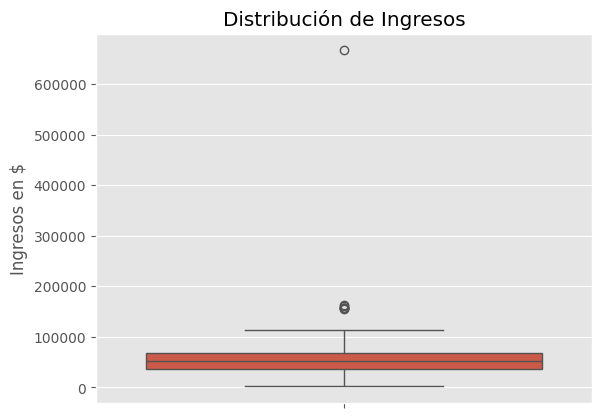

In [34]:
#Diagrama de Cajas
sns.boxplot(list(df['Income']))
plt.ylabel("Ingresos en $")
plt.title("Distribución de Ingresos")
plt.show()

Podemos ver un valor atipico el cual puede afectar mucho las medidas de tendencia central como el promedio y la desviación estandar